<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression I (from scratch)

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style("whitegrid")
sns.set(color_codes = True)

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far.

In [3]:
# Read CSV
data = pd.read_csv("Sacramento_transactions.csv")

In [4]:
data.shape

(985, 12)

In [5]:
# Head
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
# Tail
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [7]:
# Check Null Values
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [9]:
# Zip (code)is categorical value, should be string
data['zip'] = data['zip'].astype(str)

In [10]:
data['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

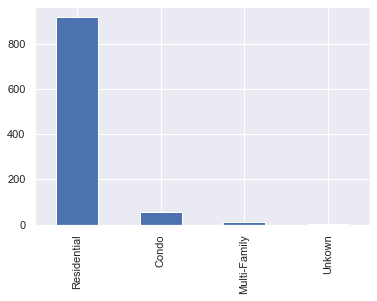

In [11]:
# Types of Data
data['type'].value_counts().plot(kind='bar');

In [12]:
data['city'].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
WEST SACRAMENTO      3
GRANITE BAY          3
RANCHO MURIETA       3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MATHER               1
COOL                 1
GARDEN VALLEY        1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
MEADOW VISTA         1
SLOUGHHOUSE          1
GREENWOOD            1
WALNUT GROVE         1
PENRYN               1
FORESTHILL           1
Name: city, dtype: int64

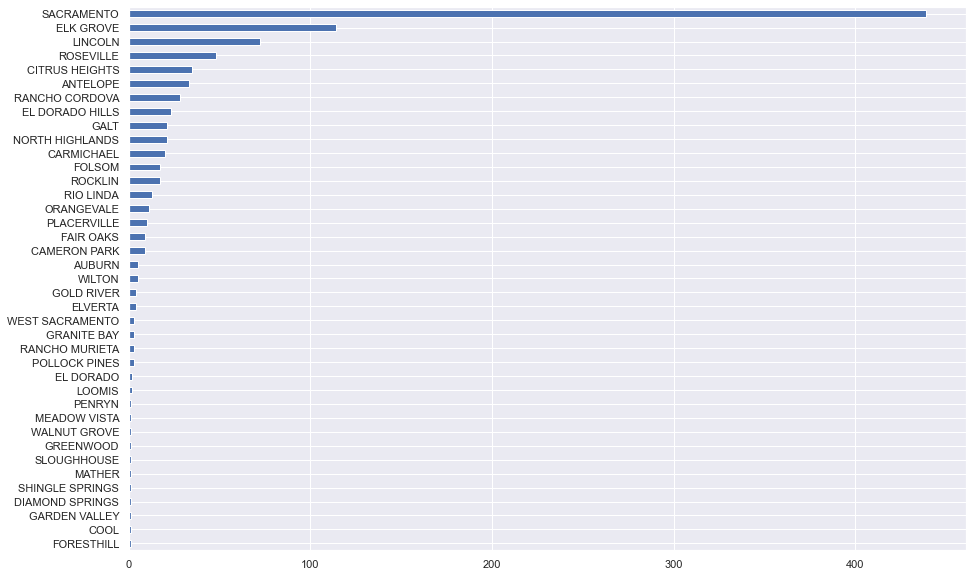

In [13]:
# City
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [14]:
# Got min value 0 for beds, baths, sqft which does not seem correct.

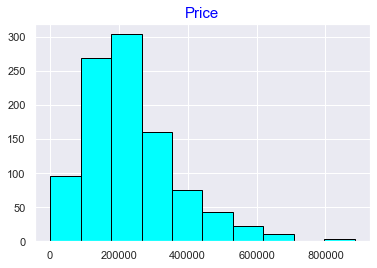

In [15]:
n, bins, patches = plt.hist(data['price'], color='cyan', edgecolor = 'black')
plt.title('Price', color = 'blue', fontsize=15)
plt.show()

In [16]:
data_subset = data[['beds', 'baths', 'sq__ft', 'price']]

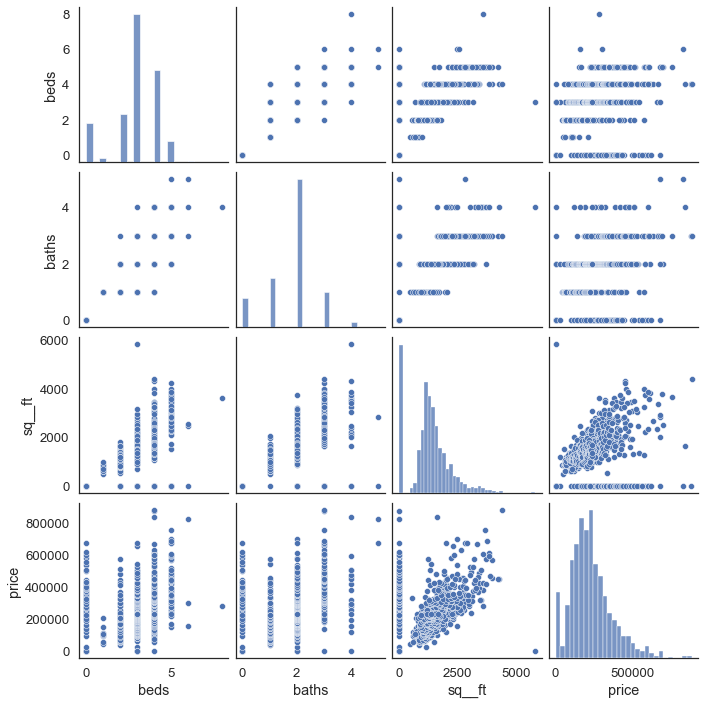

In [17]:
sns.set(font_scale=1.2, style="white")
sns.pairplot(data_subset)
plt.show()

In [18]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [19]:
data.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [20]:
data['beds'].value_counts()

3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64

In [21]:
data['baths'].value_counts()

2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64

In [22]:
data['sq__ft'].value_counts()

0       171
1120      8
795       6
1410      5
1039      5
       ... 
988       1
1656      1
876       1
1659      1
1235      1
Name: sq__ft, Length: 603, dtype: int64

In [23]:
# vectorisation operation to exclude houses with sq__ft = 0

data_subset = data[data['sq__ft'] != 0] 

In [24]:
data_subset.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,4.000000,2.000000,1851.000000,284973.250000,38.674705,-121.325844
max,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [25]:
# ANSWER

## Price is target varaible. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

In [26]:
# ANSWER

## beds
## baths
## sqft
## Type

In [27]:
# Target Variable
Y = data_subset['price']

In [28]:
# Predictor Variable
X = data_subset['beds']

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [29]:
# ANSWER
data_subset.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


In [30]:
### sq_ft is the best predictor.
### sqft got stong relationship with beds, baths

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [31]:
# ANSWER
## Mean of Price.  (Easy but not the best)
data_subset['y_hat'] = data_subset['price'].mean()

<ipython-input-31-275c4172935d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['y_hat'] = data_subset['price'].mean()


In [32]:
X = data_subset['sq__ft']
Y = data_subset['price']
Yhat = data_subset['y_hat']

In [33]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

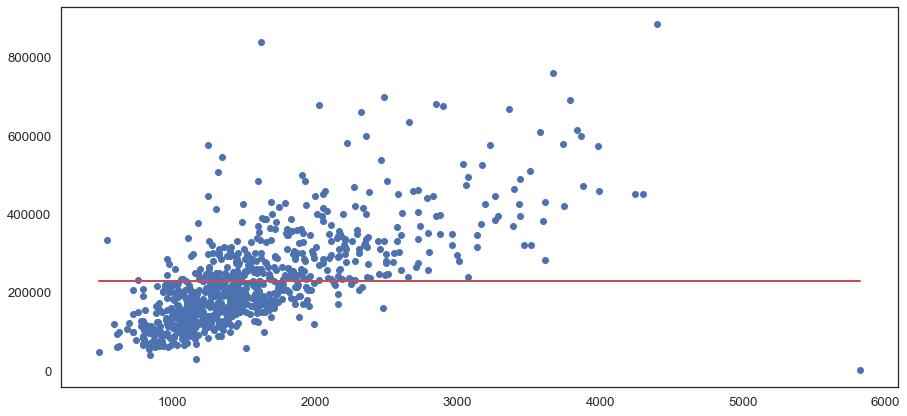

In [34]:
draw_plot(X, Y, Yhat)

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [35]:
# ANSWER
res = abs(data_subset['price'] - data_subset['y_hat']).mean()
res

88232.20396742529

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [36]:
X = data_subset['sq__ft']
Y = data_subset['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [37]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [38]:
beta_1 = calculate_beta_1(X, Y)
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [39]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [40]:
beta_0 = calculate_beta_0(X, Y)
beta_0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [41]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [42]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [43]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [44]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       75669.616731
1      108126.273822
2       61002.957264
3       67588.080518
4       48108.173751
           ...      
980     83279.223497
981     18844.615307
982     52526.118330
983      5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

Write a function to calculate R- Square value.

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [45]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [46]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [47]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [48]:
calculate_total_sum_of_square(Y)

11673191135321.695

In [49]:
calculate_r_square(Y, np.mean(Y))

0.0

In [50]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

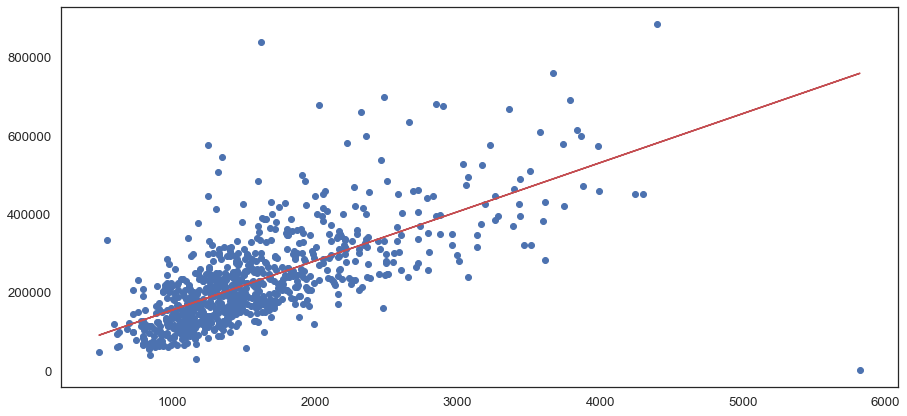

In [51]:
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [52]:
data['Yhat'] = Yhat

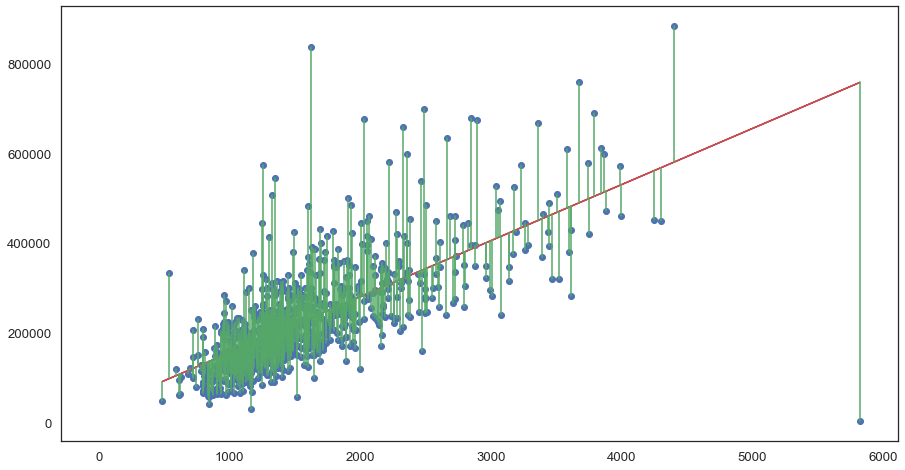

In [53]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

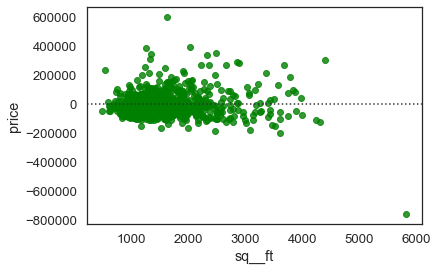

In [54]:
sns.residplot(x='sq__ft', y='price', data=data_subset, color='green')
plt.show()

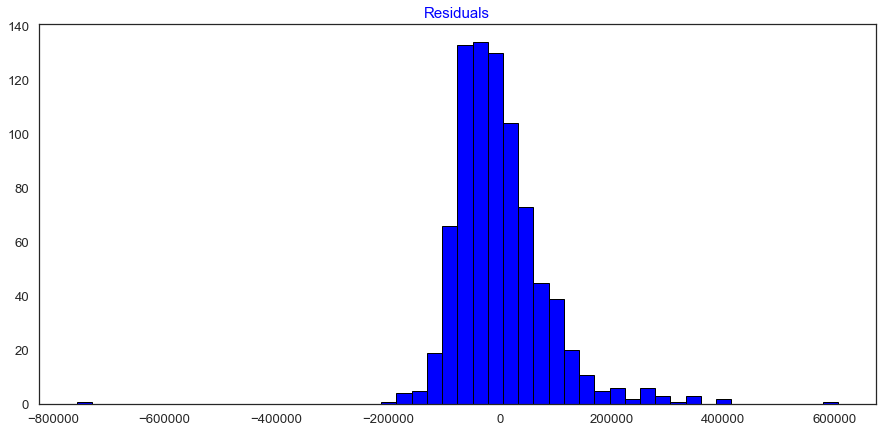

In [55]:
fig = plt.figure(figsize=(15,7))
n, bins, patches = plt.hist(resi, bins = 50, color='blue', edgecolor = 'black')
plt.title('Residuals', color = 'blue', fontsize=15)
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [56]:
# ANSWER
xpred = 1204
xpred

1204

In [57]:
beta_0

30210.633866918943

In [58]:
beta_1

125.21648667984462

In [59]:
Ypred = beta_1 * xpred + beta_0
Ypred

180971.28382945186



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



